<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [75]:
#импорт нужных библиотек
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
from functools import reduce
from scipy import stats as st
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score, recall_score,confusion_matrix,r2_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

warnings.simplefilter("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [76]:
df=pd.read_csv('Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак
* Exited — факт ухода клиента

In [77]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,9091.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,4.998,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.895,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,2.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [78]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

В признаке "Tenure" присутствуют пропуски. Нужно разобраться в причинах и повозможности обработать их. По данным видно, что данные в колонке "Age" без явных ошибок, возраст соотвествует минимальному для открытия счета в банке, максимальный возраст тоже в пределах нормы. Аналогично по признакам "Balance" & "NumOfProducts". Нужно проверить минимальную предполагаемую зарплату - "EstimatedSalary" показатель достаточно мал.Проведем анализ в следующих шагах.Некоторые признаки нужно перевести в численное значение, для обучения модели.

In [79]:
display(df[df['Tenure'].isna()==True])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,nan,0.000,3,1,0,140469.380,1
48,49,15766205,Yin,550,Germany,Male,38,nan,103391.380,1,0,1,90878.130,0
51,52,15768193,Trevisani,585,Germany,Male,36,nan,146050.970,2,0,0,86424.570,0
53,54,15702298,Parkhill,655,Germany,Male,41,nan,125561.970,1,0,0,164040.940,1
60,61,15651280,Hunter,742,Germany,Male,35,nan,136857.000,1,0,0,84509.570,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,nan,190409.340,2,1,1,138361.480,0
9956,9957,15707861,Nucci,520,France,Female,46,nan,85216.610,1,1,0,117369.520,1
9964,9965,15642785,Douglas,479,France,Male,34,nan,117593.480,2,0,0,113308.290,0
9985,9986,15586914,Nepean,659,France,Male,36,nan,123841.490,2,1,0,96833.000,0


Причин отсутствия значений в признаке не найдено. Нужно посчитать насколько существен объем пропусков относительно объема данных.

In [80]:
print((df['Tenure'].isna().sum()/df['Tenure'].count()).round(2)*100,'% пропусков в данных')

10.0 % пропусков в данных


Объем пропусков значительный, можно заменить их на случайные величины в пределах данных, чтобы неиспортить исходники.

In [81]:
rnd_numbers = (np.random.randint(0,10,size=df['Tenure'].isna().sum()))
df.loc[df['Tenure'].isna(),'Tenure']=rnd_numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Успешно заменили пропуски в признаке, можно продолжать анализ

In [82]:
display(df[df['CustomerId'].duplicated()==True])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [83]:
display(df[df.duplicated()==True])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


Явных дубликатов в данных нет.

In [84]:
print(df[df['EstimatedSalary']<=1000].sort_values(by='EstimatedSalary',ascending=True).count())

RowNumber          59
CustomerId         59
Surname            59
CreditScore        59
Geography          59
Gender             59
Age                59
Tenure             59
Balance            59
NumOfProducts      59
HasCrCard          59
IsActiveMember     59
EstimatedSalary    59
Exited             59
dtype: int64


59 записей с предполагаемой зарплатой меньше 1000 единиц. Так как мы не знаем валюту (можно использовать валюту страны, однако счет может быть открыть в евро/долларах и расчет вестись тоже в этих валютах или другой) мы не будем удалять или менять исходные данные. Оставим как есть.

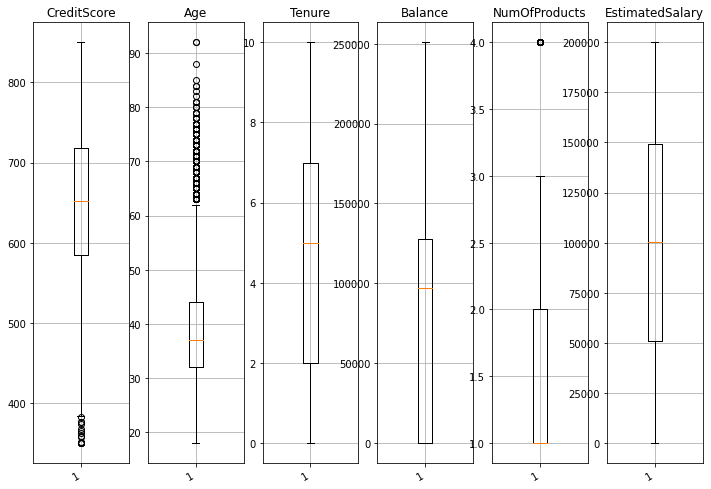

In [85]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=1, ncols=6,figsize=(12,9))

p = {ax1:'CreditScore', ax2:'Age', ax3:'Tenure', ax4:'Balance',ax5:'NumOfProducts',ax6:'EstimatedSalary'}
for ax in [ax1,ax2, ax3,ax4,ax5,ax6]:
    ax.boxplot(df[p[ax]])
    ax.grid()
    ax.set_title(p[ax])

fig.autofmt_xdate()

Из графиков видно, что данные в целом распределены без сильных выбросов. Можно их использовать для анализа

## Исследование задачи

In [86]:
df.drop(columns=['CustomerId','Surname','RowNumber'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.000,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1.000,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8.000,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1.000,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2.000,125510.820,1,1,1,79084.100,0


Мы убрали ненужные в анализе данные,чтобы использовать таблицу для обучения

In [87]:
# Применим OHE для избежения дамми ловушки
df_ohe=pd.get_dummies(df, drop_first=True)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.000,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1.000,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8.000,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1.000,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2.000,125510.820,1,1,1,79084.100,0,0,1,0


In [88]:
#Выделим численные признаки для анализа взаимосвязий
numeric = ['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','Tenure']

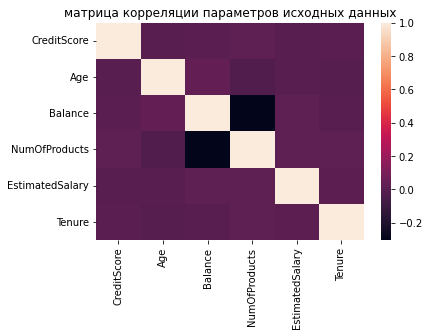

In [89]:
#Построим матрицу коррелияции признаков
sns.heatmap(df_ohe.loc[:,numeric].corr(),
            xticklabels=df_ohe.loc[:,numeric].corr().columns,
            yticklabels=df_ohe.loc[:,numeric].corr().columns)
plt.title('матрица корреляции параметров исходных данных')
plt.show()

Явной корреляции между признаками нет,дополнительно нужно посмотреть распределения

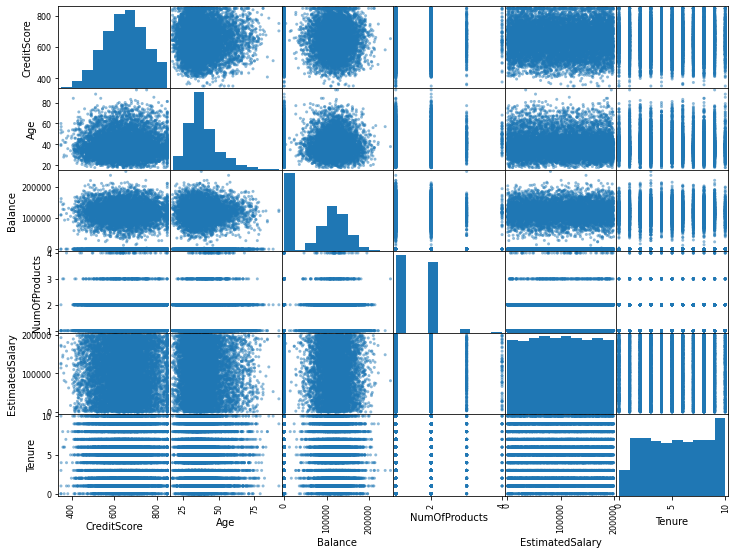

In [90]:
pd.plotting.scatter_matrix(df_ohe.loc[:,numeric],figsize=(12,9))
plt.show()

По графику не обнаружено ложной корреляции между столбцами

In [91]:
#Выделяем цель
target = df_ohe['Exited']

#Выделяем признаки
features = df_ohe.drop('Exited', axis=1)

# отделяем 30% данных для тестовой выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=12345) 

# Разделяем тестовую выборку на тестовую и валидационную
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test,target_test,test_size = 0.5,random_state = 12345)

In [92]:
# Нормируем числовые данные
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_valid.shape)

(7000, 11)
(1500, 11)


In [93]:
# Посмотрим количество объектов отрицательного и положительно класса
features[target == 0].shape, features[target == 1].shape

((7963, 11), (2037, 11))

Выявлен дисбаланс классов, нужно это изменить для повышения качества обучения модели.Но перед этим обучим модель без исправления дисбаланса, для того чтобы сравнить результаты. Значений в отрицательном классе больше положительного в 3,91 раза.

Модель = GradientBoostingClassifier(random_state=12345) | Точность = 0.273 | Полнота = 0.603 | F1 = 0.376 | ROC_AUC=0.60


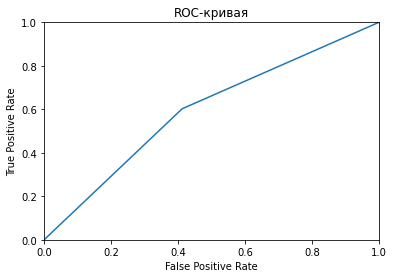

In [94]:
#Попробуем модель "GradientBoostingClassifier"
model = GradientBoostingClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("Модель = {} | Точность = {:.3f} | Полнота = {:.3f} | F1 = {:.3f} | ROC_AUC={:.2f}".format(model, precision_score(target_valid, predicted_valid), recall_score(target_valid, predicted_valid), f1_score(target_valid, predicted_valid),roc_auc_score(target_valid, predicted_valid)))
fpr, tpr, thresholds = roc_curve(target_valid, predicted_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

## Борьба с дисбалансом

In [95]:
# Сделаем функцию для бенчмаркинга по F1
def best_model_bench(model, features, target):
    model.fit(features, target)
    predicted_valid=model.predict(features_valid)
    best_model=None
    best_f1_score=0
    f1_score(target_valid, predicted_valid)
    print(model)
    print("F1:", round(f1_score(target_valid, predicted_valid),3))
    print("Полнота:",round(recall_score(target_valid, predicted_valid),3))
    print("точность:",round(precision_score(target_valid, predicted_valid),3))
    print('ROC_auc:', round(roc_auc_score(target_valid, predicted_valid),3))
    

Так как разница в классах ~4, то увеличим количество значений положительнго класса в 4 раза.

In [96]:
# Проведем увеличение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


Аналогично исходя из вывода в параграфе про поиск дисбаланса уменьшим отрицательный класс в 3,91 раза

In [97]:
#Проведем уменьшение выборки:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.391)

In [98]:

#Проверим по бенчмарку новые показатели
print("Downsample")
model_gbc_downsampled = GradientBoostingClassifier(random_state=12345)
best_model_bench(model_gbc_downsampled, features_downsampled, target_downsampled)
print()
print("Upsample")
model_gbc_upsamled = GradientBoostingClassifier(random_state=12345)
best_model_bench(model_gbc_upsamled, features_upsampled, target_upsampled)

Downsample
GradientBoostingClassifier(random_state=12345)
F1: 0.364
Полнота: 0.687
точность: 0.247
ROC_auc: 0.575

Upsample
GradientBoostingClassifier(random_state=12345)
F1: 0.377
Полнота: 0.687
точность: 0.26
ROC_auc: 0.592


Для модели линейной регресии лучше всего сделать уменьшение выборки, так как показатели f1 и roc_auc стали выше. Для модели GradientBoostingClassifier глобально не важно увеличивать или уменьшать выборку - показатели примерно равны. Перейдем к еще одному шагу на пути к улучшению модели - Изменению порога.

In [99]:
#Сделаем функцию нахождения порога и показателей качества модели
def threshold_check(model,features,target):
    model.fit(features, target)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    best_model=None
    best_f1=0
    best_recall=0
    best_precision=0
    best_roc_auc=0
    best_threshold=0
    for threshold in np.arange(0, 0.90, 0.02):
        predicted_valid = probabilities_one_valid > threshold
        precision = precision_score(target_valid, predicted_valid)
        recall = recall_score(target_valid, predicted_valid)
        f1=f1_score(target_valid, predicted_valid)
        roc_auc=roc_auc_score(target_valid, predicted_valid)
        if f1>best_f1:
            best_f1=f1
            best_model=model
            best_recall=recall
            best_precision=precision
            best_roc_auc=roc_auc
            best_threshold=threshold
    print("Модель = {} | Порог = {:.2f} | Точность = {:.3f} | Полнота = {:.3f} | F1 = {:.3f} | ROC_AUC={:.2f}".format(model,
        best_threshold, best_precision, best_recall, best_f1,best_roc_auc))
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    print()
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(print('ROC-кривая по',best_model))
    plt.show() 


Модель = GradientBoostingClassifier(random_state=12345) | Порог = 0.70 | Точность = 0.326 | Полнота = 0.528 | F1 = 0.403 | ROC_AUC=0.62

ROC-кривая по GradientBoostingClassifier(random_state=12345)


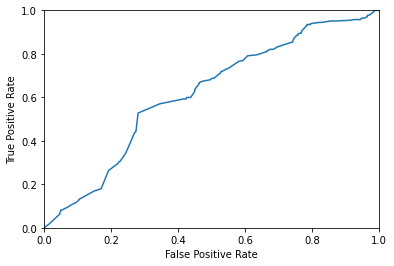

In [100]:
threshold_check(model_gbc_upsamled, features_upsampled, target_upsampled)

После  изменения порога качество модели по показателям увелиилось, Перейдем к нахождению лучших параметров и оценки f1 для этих парамтров.

## Тестирование модели

Посчитаем коэффициент детерминации для моделей на тестовых данных

In [101]:
#Функция для установки порога
def proby (model,threshold): 
    threshold=threshold
    prob=[]
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    for probab in probabilities_one_valid:
        if probab > threshold:
            prob.append(1)
        else:
            prob.append(0)
    return prob

In [102]:
#Сделаем функцию анализа метрик

def test_r2_f1(model,features,target):
    model.fit(features, target)
    predicted_test = model.predict(features)
    movedts_valid=proby(model, 0.74)
    print("R2 =",r2_score(target,predicted_test))
    print("F1 =",f1_score(target, predicted_test))
    print("ROC =",f1_score(target, predicted_test))

In [103]:
#Объединяем выборки
features_bigtrain=pd.concat([features_train, features_valid])
target_bigtrain=pd.concat([target_train, target_valid])


In [104]:
#Считаем метрики для градиент бустинг 
model=GradientBoostingClassifier(random_state=12345)
test_r2_f1(model,features_bigtrain,target_bigtrain)

R2 = 0.21722363758892027
F1 = 0.6071036250457708
ROC = 0.6071036250457708


# Вывод
Мы изучили данные, выявили пропущенные значения, заменили их на случайные в рамках мимума и максимума по признаку. Далее провели анализ явной взаимосвзяи между данными, оказалось, что ои не сильно коррелируют. В обучении использовалось несколько спобов борьбы против дисбаланса классов. По итогу модель "GradientBoostingClassifier" проходит по порогу F1 и коэффициент детерминации выше 0 у этой модели.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*